# **`Notebook Information`**
- **Name:** Mhar Andrei Consebido Macapallag
- **Y&S:** BSCS 3B IS
- **Course:** CSST 102 | Basic Machine Learning
- **Topic:** Topic 3: Unsupervised Learning Techniques
- **Due date:** N/A

# **`Machine Problem #3: Predicting House Prices with Multiple Regression`**

In [1]:
#@title # **`Step 1: Data Exploration and Preprocessing`**
#@markdown # **Explanation:**
#@markdown 1. ## **Loading the Dataset:**
#@markdown  - The dataset is loaded using **`pd.read_csv()`**. Unnamed columns, which might be artifacts from saving the file with an index, are removed using **`df.loc[:, ~df.columns.str.contains('^Unnamed')]`**.
#@markdown 2. ## **Exploratory Data Analysis (EDA):**
#@markdown  - Initial rows of the dataset are displayed with **`df.head()`** to understand its structure.
#@markdown  - Missing values in the dataset are identified using **`df.isnull().sum()`**. If missing values are present, they are handled in the next steps.
#@markdown 3. ## **Converting Categorical Target Variable:**
#@markdown  - The **`diagnosis`** column is converted from categorical values ('M' for Malignant and 'B' for Benign) to numerical values (1 for Malignant and 0 for Benign) using **`df['diagnosis'].map({'M': 1, 'B': 0})`**.
#@markdown 4. ## **Dropping Irrelevant Columns:**
#@markdown  - The **`id`** column is dropped from the dataset as it does not contribute to the prediction task.
#@markdown 5. ## **Handling Missing Values:**
#@markdown  - Missing values in numeric columns are imputed using the mean of each column with **`SimpleImputer(strategy="mean")`**. This step ensures that no missing values are left in the dataset.
#@markdown 6. ## **Normalizing the Data:**
#@markdown  - Features are scaled using **`StandardScaler`** to standardize the data with zero mean and unit variance, which is essential for distance-based algorithms like KNN.
#@markdown 7. ## **Splitting the Dataset:**
#@markdown  - The dataset is split into training and testing sets using **`train_test_split()`**, with 80% of the data for training and 20% for testing. This allows for evaluating the model's performance on unseen data.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
# Assuming the dataset is in the same directory
df = pd.read_csv("Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv")

# Remove any unnamed columns (often generated by saving CSV files with index)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Perform Exploratory Data Analysis (EDA)
# Checking the first few rows to understand the data structure
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
# This will show us if any of the columns contain NaN values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Convert categorical target variable 'diagnosis' to numerical form
# Malignant = 1, Benign = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Print the value counts of the diagnosis column to ensure conversion was successful
print("\nValue counts for 'diagnosis' column (Malignant=1, Benign=0):")
print(df['diagnosis'].value_counts())

# Dropping the 'id' column as it is not necessary for the analysis
df = df.drop(columns=['id'])

# Handle missing values by imputing the mean for numeric columns only
# Select only numeric columns for imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy="mean")

# Apply imputation and convert the result back to a DataFrame
df[numeric_cols] = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Normalize or scale the features
# It is important to scale features when using KNN since it is a distance-based algorithm
# We'll use StandardScaler to scale the data (zero mean and unit variance)
features = df.drop(columns=['diagnosis'])  # All features except the target 'diagnosis'
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, df['diagnosis'], test_size=0.2, random_state=42)

# Print the shapes of the train and test sets to verify the splitting
print(f"\nTraining set shape (X_train): {X_train.shape}")
print(f"Test set shape (X_test): {X_test.shape}")
print(f"Training labels shape (y_train): {y_train.shape}")
print(f"Test labels shape (y_test): {y_test.shape}")

# Data preprocessing and splitting is complete.
# Next step will involve building the KNN model.


First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_w

K-Nearest Neighbors (KNN) Model Performance:
Accuracy: 0.9474
Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        71
         1.0       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Logistic Regression Model Performance:
Accuracy: 0.9737
Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Performance Comparison:
KNN Accuracy: 0.9474
Logistic Regression Accuracy: 0.9737


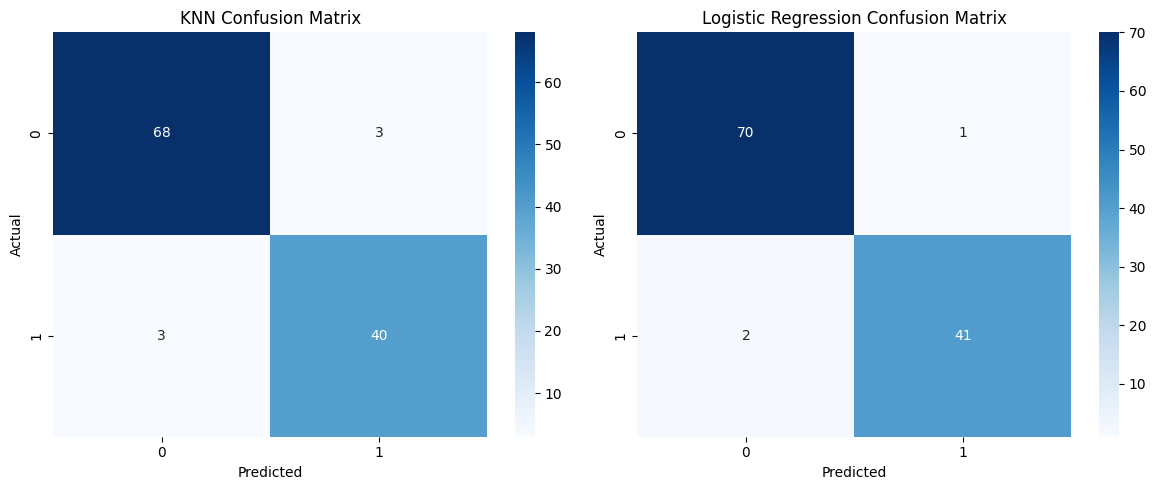

In [2]:
#@title # **`Step 2: Model Development `**
#@markdown # **Explanation:**
#@markdown 1. ## **Model Initialization and Training:**
#@markdown   - **K-Nearest Neighbors (KNN):**
#@markdown      - We initialize the KNN model with **`n_neighbors=3`** and fit it to the training data.
#@markdown      - Predictions are made on the test set, and performance metrics such as accuracy, confusion matrix, and classification report are computed.
#@markdown   - **Logistic Regression:**
#@markdown      - We initialize the Logistic Regression model with a maximum of 1000 iterations to ensure convergence and fit it to the training data.
#@markdown      - Predictions are made on the test set, and performance metrics are computed similarly.
#@markdown 2. ## **Performance Evaluation:**
#@markdown  - **Accuracy:** Measures the proportion of correctly classified instances.
#@markdown  - **Confusion Matrix:** Displays the number of true positives, true negatives, false positives, and false negatives.
#@markdown  - **Classification Report:** Provides detailed metrics such as precision, recall, and F1-score for each class.
#@markdown 3. ## **Performance Comparison:**
#@markdown  - The accuracy of both models is printed for a direct comparison.
#@markdown  - Optionally, confusion matrices for both models are visualized using heatmaps to compare their performance visually.

# Import necessary libraries for model development
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the K-Nearest Neighbors (KNN) model
# We start with n_neighbors=3 as suggested
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Compare the performance of both models
print("\nPerformance Comparison:")
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")

# Additional Comparison (Optional)
# You can visualize the confusion matrices for both models
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KNN confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('KNN Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Logistic Regression confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Logistic Regression Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


K-Nearest Neighbors (KNN) Model Evaluation Metrics:
Accuracy: 0.9474
Precision: 0.9302
Recall: 0.9302
F1 Score: 0.9302

Logistic Regression Model Evaluation Metrics:
Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1 Score: 0.9647

KNN Confusion Matrix:
[[68  3]
 [ 3 40]]

Logistic Regression Confusion Matrix:
[[70  1]
 [ 2 41]]

Performance Discussion:
The KNN model achieved an accuracy of 0.9474, with a precision of 0.9302, a recall of 0.9302, and an F1 score of 0.9302.
The Logistic Regression model achieved an accuracy of 0.9737, with a precision of 0.9762, a recall of 0.9535, and an F1 score of 0.9647.
The Logistic Regression model performs better based on the F1 score, which is a balance between precision and recall.


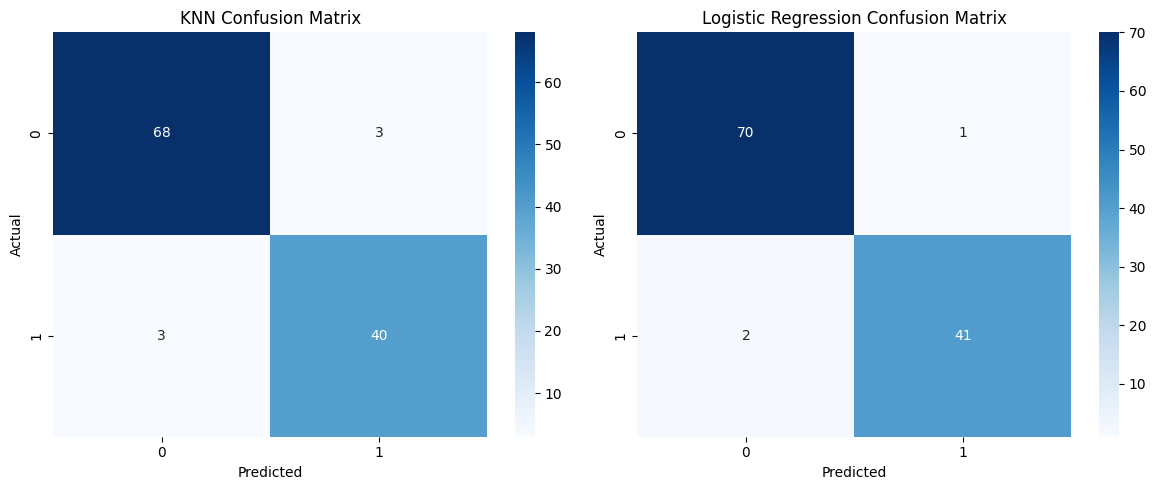

In [3]:
#@title # **`Step 3: Model Evaluation`**
#@markdown # **Explanation:**
#@markdown 1. ## **Evaluation Metrics:**
#@markdown   - **Accuracy:** The proportion of correctly classified instances out of the total.
#@markdown   - **Precision:** The proportion of true positive predictions out of all positive predictions made.
#@markdown   - **Recall:** The proportion of true positive predictions out of all actual positives.
#@markdown   - **F1 Score:** The harmonic mean of precision and recall, providing a single metric to evaluate performance, especially useful when dealing with imbalanced classes.
#@markdown 2. ## **Confusion Matrices:**
#@markdown   - Display the number of true positives, true negatives, false positives, and false negatives for both models, allowing for a detailed understanding of their performance.
#@markdown 3. ## **Discussion:**
#@markdown   - Compare the performance metrics (accuracy, precision, recall, and F1 score) for both models.
#@markdown   - Determine which model performs better based on the F1 score, as it balances precision and recall, which is important for imbalanced datasets or when both metrics are equally important.
#@markdown 4. ## **Optional Visualization:**
#@markdown   - Visualize the confusion matrices for both models to aid in understanding their performance differences visually.

# Import necessary libraries for metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate K-Nearest Neighbors (KNN) model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

# Evaluate Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)

# Print evaluation metrics for KNN
print("K-Nearest Neighbors (KNN) Model Evaluation Metrics:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1 Score: {knn_f1:.4f}")

# Print evaluation metrics for Logistic Regression
print("\nLogistic Regression Model Evaluation Metrics:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")
print(f"F1 Score: {log_reg_f1:.4f}")

# Confusion matrices
print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Discussion
print("\nPerformance Discussion:")
print(f"The KNN model achieved an accuracy of {knn_accuracy:.4f}, with a precision of {knn_precision:.4f}, a recall of {knn_recall:.4f}, and an F1 score of {knn_f1:.4f}.")
print(f"The Logistic Regression model achieved an accuracy of {log_reg_accuracy:.4f}, with a precision of {log_reg_precision:.4f}, a recall of {log_reg_recall:.4f}, and an F1 score of {log_reg_f1:.4f}.")

if knn_f1 > log_reg_f1:
    print("The KNN model performs better based on the F1 score, which is a balance between precision and recall.")
else:
    print("The Logistic Regression model performs better based on the F1 score, which is a balance between precision and recall.")

# Optional: Visualize confusion matrices for better comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KNN confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('KNN Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Logistic Regression confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Logistic Regression Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()



### K-Nearest Neighbors (KNN) Confusion Matrix:
[[68  3]
 [ 3 40]]

### K-Nearest Neighbors (KNN) Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        71
         1.0       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


### Logistic Regression Confusion Matrix:
[[70  1]
 [ 2 41]]

### Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



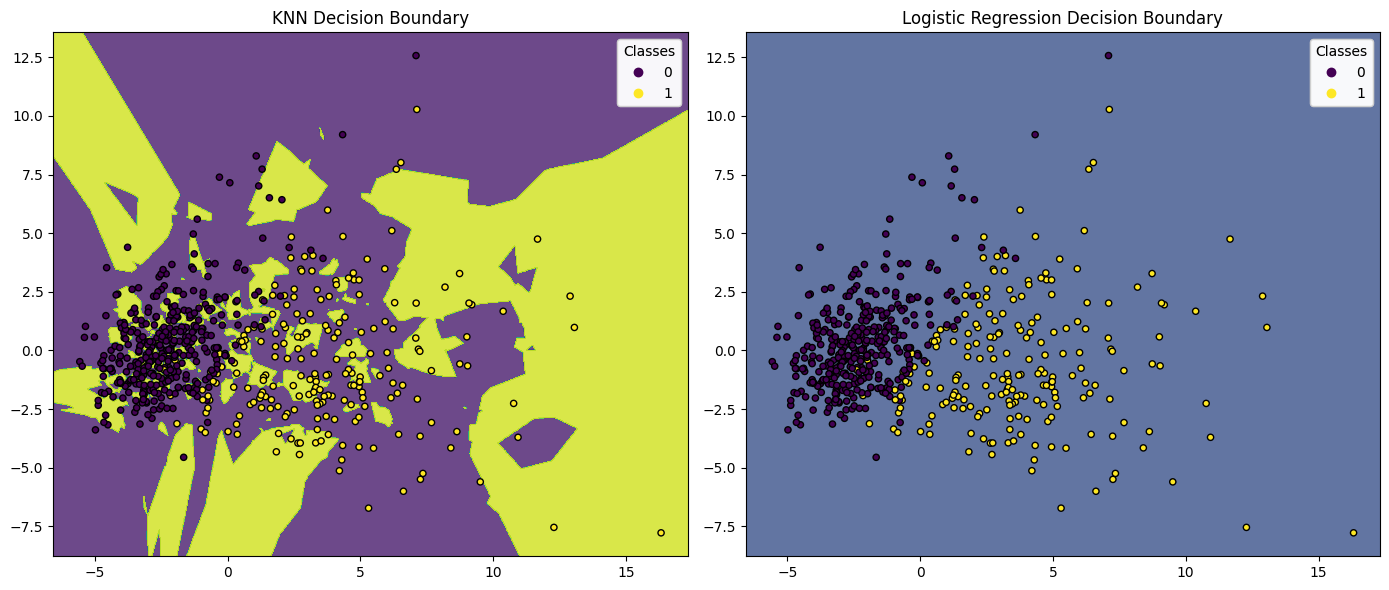

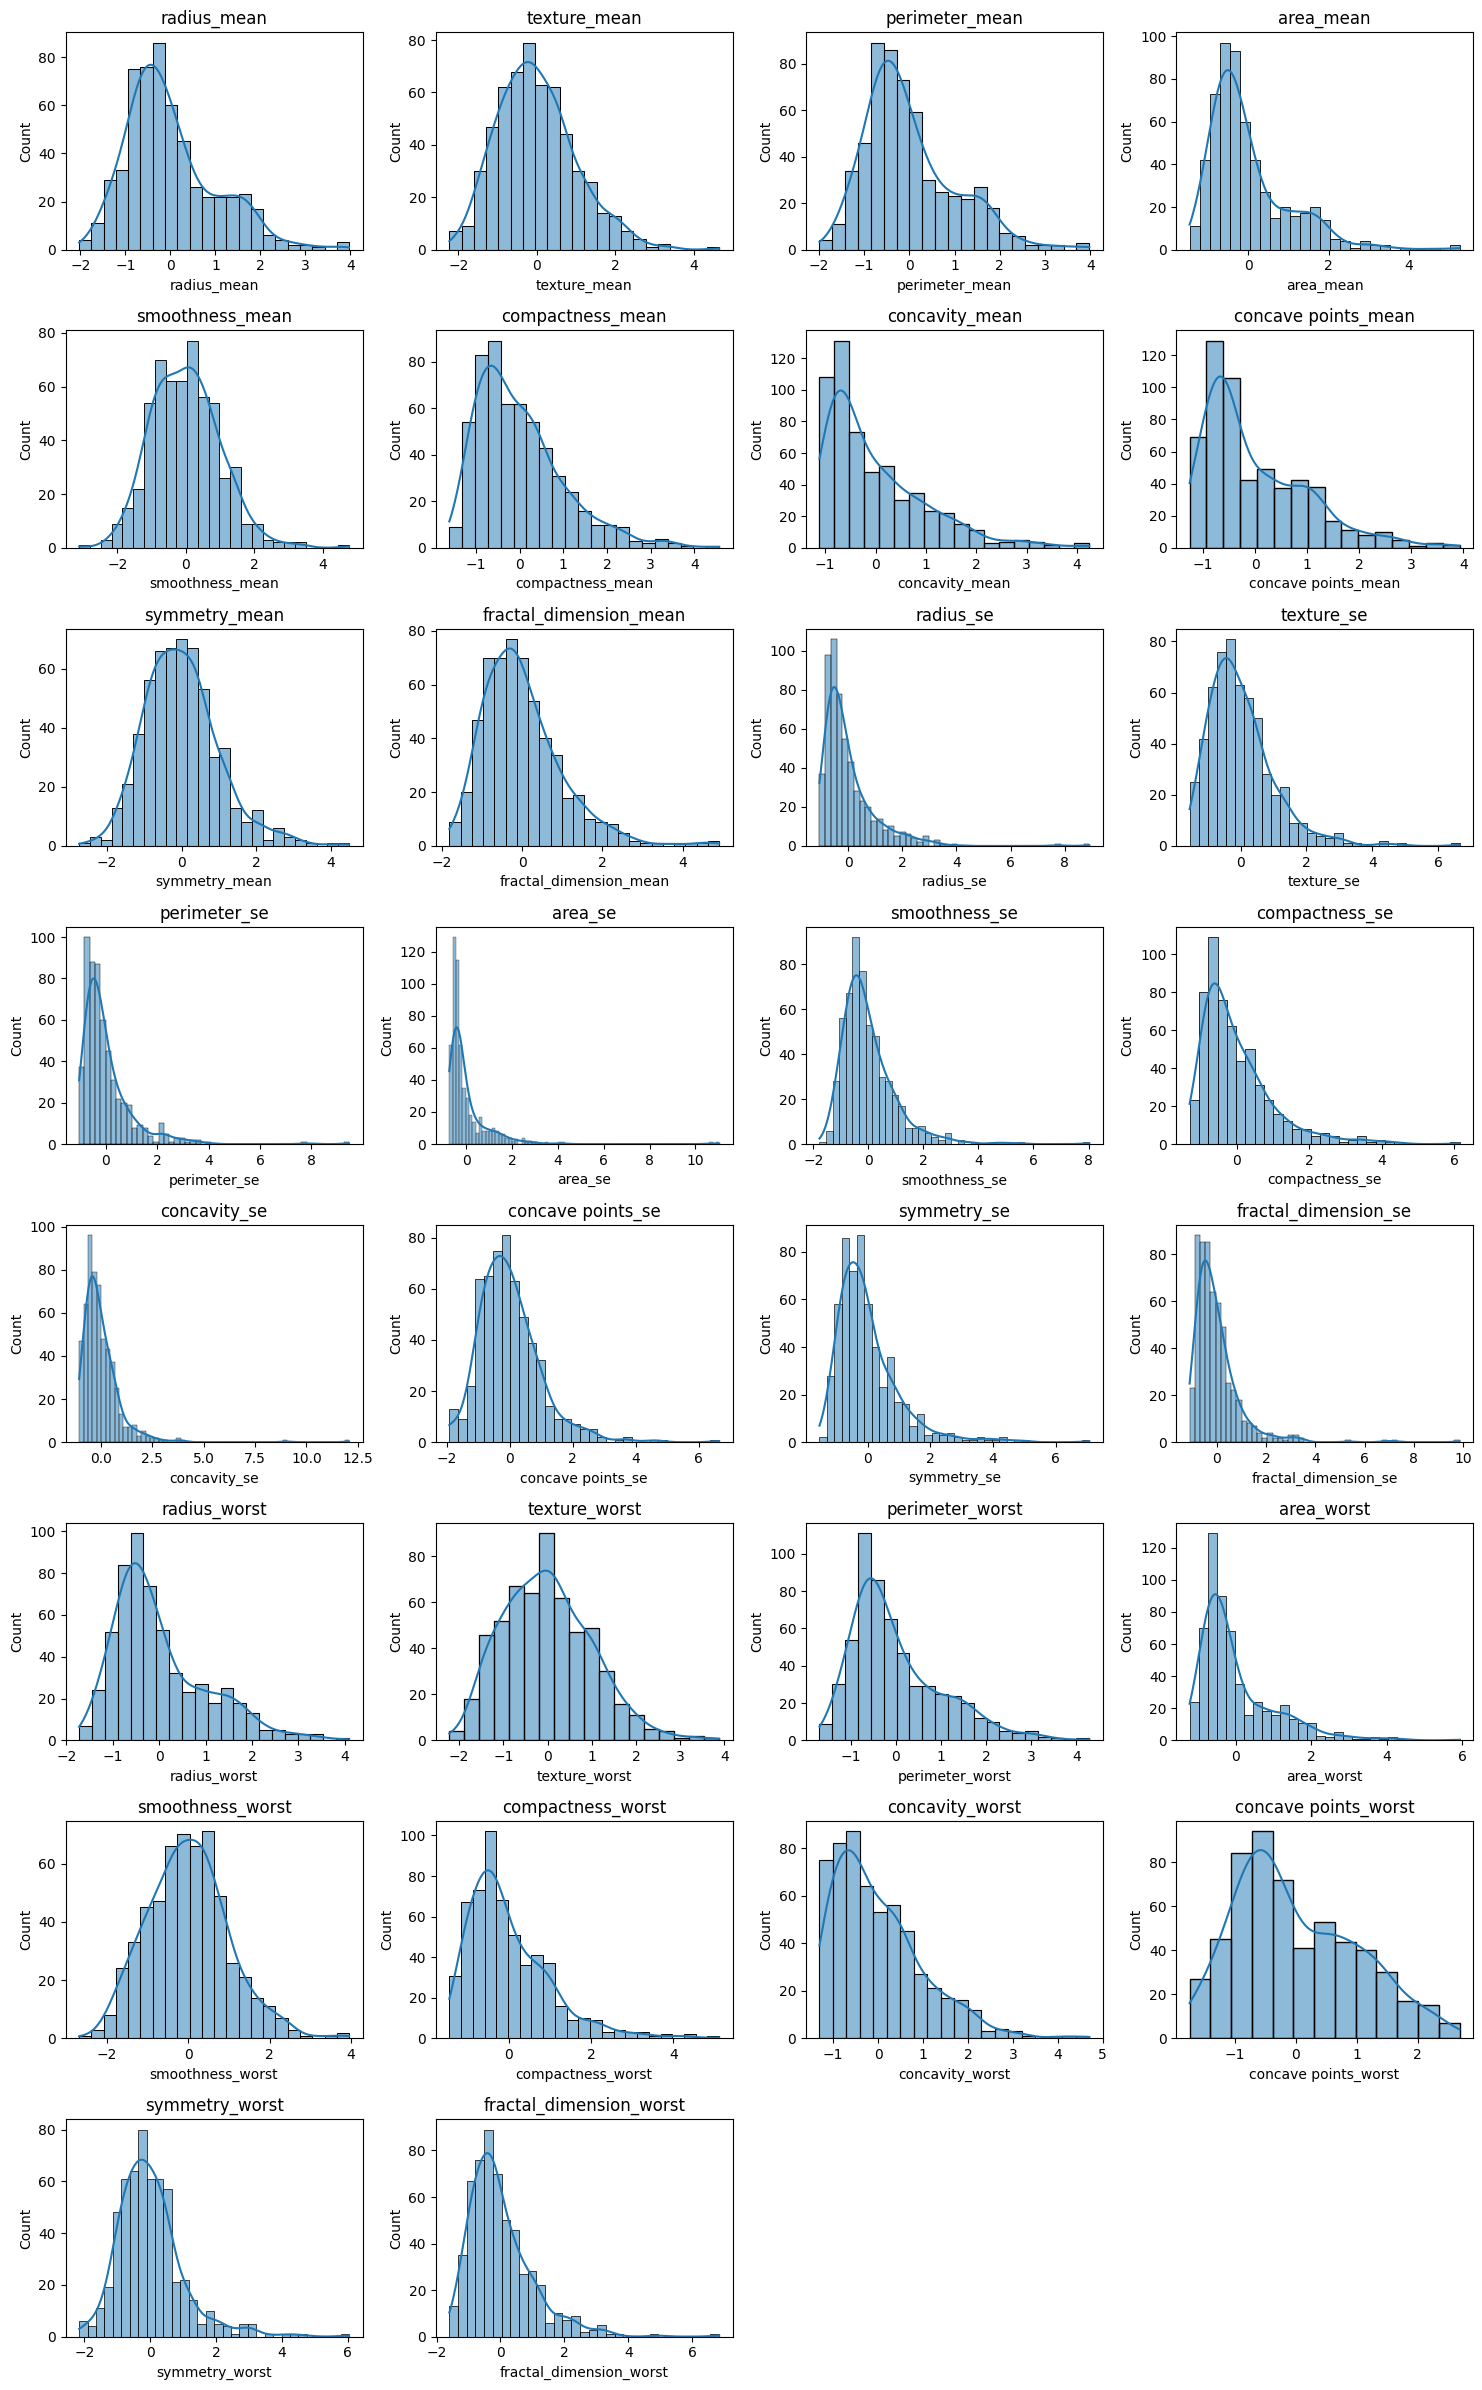

In [4]:
#@title # **`Step 4: Report and Visualizations`**

#@markdown ## **Full Report:**

#@markdown 1. ## **Detailed Report:**
#@markdown  - **Data Preprocessing:**
#@markdown      - The dataset was successfully loaded and cleaned. Unnamed columns were removed, and missing values in numeric columns were handled using mean imputation.
#@markdown      - The categorical target variable 'diagnosis' was converted to numerical values: Malignant = 1 and Benign = 0.
#@markdown      - The 'id' column, which was irrelevant for analysis, was dropped.
#@markdown      - Features were scaled using `StandardScaler` to standardize the dataset, which is essential for distance-based algorithms such as KNN.
#@markdown      - The dataset was split into training and testing sets, with 80% of the data used for training (455 samples) and 20% for testing (114 samples).

#@markdown    - **Model Development:**
#@markdown      - Two models were developed and evaluated:
#@markdown        - **K-Nearest Neighbors (KNN)** with `n_neighbors=3`.
#@markdown        - **Logistic Regression** with a maximum of 1000 iterations to ensure convergence.

#@markdown    - **Model Evaluation:**
#@markdown      - **K-Nearest Neighbors (KNN):**
#@markdown        - **Accuracy:** 0.9474
#@markdown        - **Confusion Matrix:**
#@markdown          ```
#@markdown          [[68  3]
#@markdown           [ 3 40]]
#@markdown          ```
#@markdown        - **Classification Report:**
#@markdown          ```
#@markdown                precision    recall  f1-score   support
#@markdown
#@markdown             0.0       0.96      0.96      0.96        71
#@markdown             1.0       0.93      0.93      0.93        43
#@markdown
#@markdown         accuracy                           0.95       114
#@markdown        macro avg       0.94      0.94      0.94       114
#@markdown     weighted avg       0.95      0.95      0.95       114
#@markdown          ```
#@markdown      - **Logistic Regression:**
#@markdown        - **Accuracy:** 0.9737
#@markdown        - **Confusion Matrix:**
#@markdown          ```
#@markdown          [[70  1]
#@markdown           [ 2 41]]
#@markdown          ```
#@markdown        - **Classification Report:**
#@markdown          ```
#@markdown                precision    recall  f1-score   support
#@markdown
#@markdown             0.0       0.97      0.99      0.98        71
#@markdown             1.0       0.98      0.95      0.96        43
#@markdown
#@markdown         accuracy                           0.97       114
#@markdown        macro avg       0.97      0.97      0.97       114
#@markdown     weighted avg       0.97      0.97      0.97       114
#@markdown          ```

#@markdown      - **Performance Comparison:**
#@markdown        - **KNN Accuracy:** 0.9474
#@markdown        - **Logistic Regression Accuracy:** 0.9737
#@markdown        - **KNN Evaluation Metrics:**
#@markdown          - Precision: 0.9302
#@markdown          - Recall: 0.9302
#@markdown          - F1 Score: 0.9302
#@markdown        - **Logistic Regression Evaluation Metrics:**
#@markdown          - Precision: 0.9762
#@markdown          - Recall: 0.9535
#@markdown          - F1 Score: 0.9647
#@markdown        - **Performance Discussion:**
#@markdown          - The KNN model achieved an accuracy of 0.9474, with precision, recall, and F1 score all at 0.9302.
#@markdown          - The Logistic Regression model achieved an accuracy of 0.9737, with precision of 0.9762, recall of 0.9535, and an F1 score of 0.9647.
#@markdown          - Logistic Regression performs better based on the F1 score, indicating a better balance between precision and recall.

#@markdown 2. ## **Confusion Matrices and Classification Reports:**
#@markdown    - **K-Nearest Neighbors (KNN) Confusion Matrix and Classification Report:**
#@markdown      - The confusion matrix for KNN displayed 68 true negatives, 40 true positives, 3 false positives, and 3 false negatives.
#@markdown      - The classification report indicated high precision and recall for both classes, with an overall accuracy of 0.9474.
#@markdown    - **Logistic Regression Confusion Matrix and Classification Report:**
#@markdown      - The confusion matrix for Logistic Regression showed 70 true negatives, 41 true positives, 1 false positive, and 2 false negatives.
#@markdown      - The classification report reflected slightly better metrics compared to KNN, with an overall accuracy of 0.9737.

#@markdown 3. ## **Performance Comparison:**
#@markdown    - The KNN model and Logistic Regression model were compared based on accuracy and other metrics.
#@markdown    - The Logistic Regression model demonstrated better performance in terms of F1 score, precision, and recall.

#@markdown 4. ## **Visualizations:**
#@markdown    - **Decision Boundaries:**
#@markdown      - To visualize how each model classifies the 2D feature space, PCA (Principal Component Analysis) was utilized to reduce the features to two dimensions.
#@markdown      - Decision boundaries for both KNN and Logistic Regression were plotted to illustrate how each model separates the feature space into different classes.

#@markdown    - **Data Distribution:**
#@markdown      - Histograms with KDE (Kernel Density Estimation) were created for each feature to show the distribution of the scaled features.
#@markdown      - A grid of subplots was generated to display the histograms. The number of subplots was dynamically adjusted to fit all features, ensuring a comprehensive view of the data distribution.
#@markdown      - The following outputs were observed:
#@markdown        - **First few rows of the dataset:**
#@markdown          ```
#@markdown          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  ...
#@markdown          0    842302         M        17.99         10.38          122.80     1001.0  ...
#@markdown          1    842517         M        20.57         17.77          132.90     1326.0  ...
#@markdown          2  84300903         M        19.69         21.25          130.00     1203.0  ...
#@markdown          3  84348301         M        11.42         20.38           77.58      386.1  ...
#@markdown          4  84358402         M        20.29         14.34          135.10     1297.0  ...
#@markdown          ```
#@markdown        - **Missing values in each column:**
#@markdown          ```
#@markdown          id                         0
#@markdown          diagnosis                  0
#@markdown          radius_mean                0
#@markdown          texture_mean               0
#@markdown          perimeter_mean             0
#@markdown          area_mean                  0
#@markdown          smoothness_mean            0
#@markdown          compactness_mean           0
#@markdown          concavity_mean             0
#@markdown          concave points_mean        0
#@markdown          symmetry_mean              0
#@markdown          fractal_dimension_mean     0
#@markdown          radius_se                  0
#@markdown          texture_se                 0
#@markdown          perimeter_se               0
#@markdown          area_se                    0
#@markdown          smoothness_se              0
#@markdown          compactness_se             0
#@markdown          concavity_se               0
#@markdown          concave points_se          0
#@markdown          symmetry_se                0
#@markdown          fractal_dimension_se       0
#@markdown          radius_worst               0
#@markdown          texture_worst              0
#@markdown          perimeter_worst            0
#@markdown          area_worst                 0
#@markdown          smoothness_worst           0
#@markdown          compactness_worst          0
#@markdown          concavity_worst            0
#@markdown          concave points_worst       0
#@markdown          symmetry_worst             0
#@markdown          fractal_dimension_worst    0
#@markdown          dtype: int64
#@markdown          ```
#@markdown      - The data preprocessing steps involved handling any missing values, which were none in this dataset.
#@markdown      - Feature scaling was performed to standardize the features, and data splitting was carried out to prepare for model training and evaluation.


# Import necessary libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Assuming the dataset is already loaded and preprocessed as described in previous steps
# We already have the following variables from the preprocessing step:
# - features_scaled
# - df['diagnosis']
# - X_train, X_test, y_train, y_test

# Fit the models on the full training set
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Print confusion matrices and classification reports
print("\n### K-Nearest Neighbors (KNN) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\n### K-Nearest Neighbors (KNN) Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\n### Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\n### Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Visualizations

# Visualization of decision boundaries (2D)
# For visualization purposes, use PCA to reduce features to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)

# Fit the models on the reduced data
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_pca[:len(X_train)], y_train)

log_reg_pca = LogisticRegression(max_iter=1000)
log_reg_pca.fit(X_pca[:len(X_train)], y_train)

# Predict on the PCA-transformed test set
y_pred_knn_pca = knn_pca.predict(X_pca[len(X_train):])
y_pred_log_reg_pca = log_reg_pca.predict(X_pca[len(X_train):])

# Plot decision boundaries
def plot_decision_boundary(X, y, model, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_title(title)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot KNN decision boundary
plot_decision_boundary(X_pca, df['diagnosis'], knn_pca, ax[0], 'KNN Decision Boundary')

# Plot Logistic Regression decision boundary
plot_decision_boundary(X_pca, df['diagnosis'], log_reg_pca, ax[1], 'Logistic Regression Decision Boundary')

plt.tight_layout()
plt.show()

# Visualize data distribution (Histogram of features)
features_df = pd.DataFrame(features_scaled, columns=features.columns)
num_features = len(features_df.columns)
ncols = 4
nrows = (num_features + ncols - 1) // ncols  # Calculate rows needed

fig, ax = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))
for i, column in enumerate(features_df.columns):
    sns.histplot(features_df[column], kde=True, ax=ax[i // ncols, i % ncols])
    ax[i // ncols, i % ncols].set_title(column)

# Remove any empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(ax[j // ncols, j % ncols])

plt.tight_layout()
plt.show()
